In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
X = data.iloc[:, 1:23]
Y = data.iloc[:,:1]

In [5]:
X['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [6]:
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

In [7]:
x = pd.get_dummies(X, prefix_sep='_')
#x1 = pd.get_dummies(X, prefix_sep='_')
#x = StandardScaler().fit_transform(x1)
y = pd.DataFrame(data = LabelEncoder().fit_transform(Y))
x.head()
x.info()
#y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.3 KB


C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 101)

[[1274    0]
 [   0 1164]]
1.0
0.0
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]


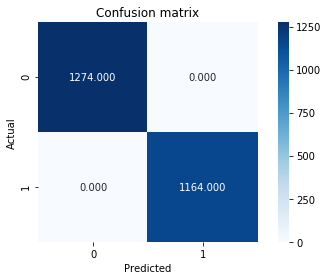

In [9]:
model = DecisionTreeClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(f1_score(y_pred, y_test, average = None))

C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[1274    0]
 [   0 1164]]
1.0
0.0
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]


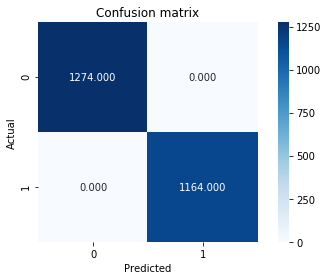

In [10]:
# WIth RANDOMFORESt and WITHOUT LDA
model = RandomForestClassifier(n_estimators=700).fit(x_train, y_train)

y_pred = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(f1_score(y_pred, y_test, average = None))

In [19]:
# WITH LDA

lda = LinearDiscriminantAnalysis(n_components =  1)
x_lda = lda.fit_transform(x_train, y_train)
x_testlda = lda.transform(x_test)
x_lda = pd.DataFrame(data = x_lda)


x_lda.head()

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,0
0,-25.130442
1,-25.537515
2,-23.326868
3,28.234734
4,-25.545793


C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


[[1274    0]
 [   0 1164]]
1.0
0.0
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]


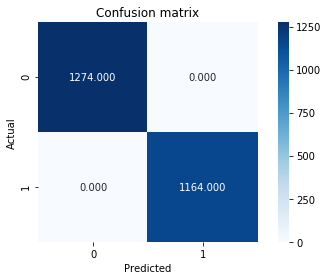

In [20]:


modelICA = RandomForestClassifier(n_estimators=700).fit(x_lda, y_train)

y_predLDA = modelICA.predict(x_testlda)
conf_matrix = metrics.confusion_matrix(y_test, y_predLDA)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_predLDA)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_predLDA)) # error
print(metrics.precision_score(y_test, y_predLDA, average = None)) # precision
print(metrics.recall_score(y_test, y_predLDA, average = None)) # recall
print(metrics.f1_score(y_test, y_predLDA, average = None)) # F1 score
print(f1_score(y_predLDA, y_test, average = None))

[[1274    0]
 [   2 1162]]
0.9991796554552912
0.0008203445447088065
[0.9984326 1.       ]
[1.         0.99828179]
[0.99921569 0.99914015]
[0.99921569 0.99914015]


C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


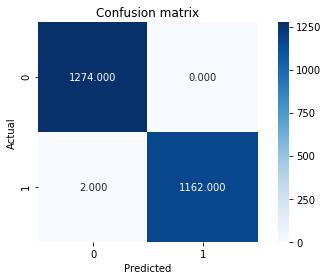

In [21]:
# WITH LDA classifier

modelLDAC = LinearDiscriminantAnalysis().fit(x_lda, y_train)
y_predLDA = modelLDAC.predict(x_testlda)
conf_matrix = metrics.confusion_matrix(y_test, y_predLDA)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_predLDA)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_predLDA)) # error
print(metrics.precision_score(y_test, y_predLDA, average = None)) # precision
print(metrics.recall_score(y_test, y_predLDA, average = None)) # recall
print(metrics.f1_score(y_test, y_predLDA, average = None)) # F1 score
print(f1_score(y_predLDA, y_test, average = None))

In [22]:
# WITH LDA 3 components

lda = LinearDiscriminantAnalysis(n_components =  3)
x_lda = lda.fit_transform(x_train, y_train)
x_testlda = lda.transform(x_test)
x_lda = pd.DataFrame(data = x_lda)


x_lda.head()

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(117, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  

,0
0,-25.130442
1,-25.537515
2,-23.326868
3,28.234734
4,-25.545793


C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


[[1274    0]
 [   0 1164]]
1.0
0.0
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]


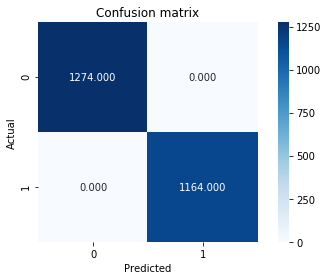

In [23]:


modelICA = RandomForestClassifier(n_estimators=700).fit(x_lda, y_train)

y_predLDA = modelICA.predict(x_testlda)
conf_matrix = metrics.confusion_matrix(y_test, y_predLDA)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_predLDA)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_predLDA)) # error
print(metrics.precision_score(y_test, y_predLDA, average = None)) # precision
print(metrics.recall_score(y_test, y_predLDA, average = None)) # recall
print(metrics.f1_score(y_test, y_predLDA, average = None)) # F1 score
print(f1_score(y_predLDA, y_test, average = None))

[[1274    0]
 [   0 1164]]
1.0
0.0
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]


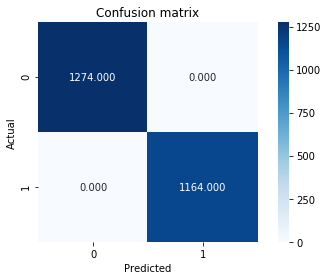

In [16]:
modelICADT = DecisionTreeClassifier().fit(x_lda, y_train)

y_predLDA = modelICADT.predict(x_testlda)
conf_matrix = metrics.confusion_matrix(y_test, y_predLDA)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_predLDA)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_predLDA)) # error
print(metrics.precision_score(y_test, y_predLDA, average = None)) # precision
print(metrics.recall_score(y_test, y_predLDA, average = None)) # recall
print(metrics.f1_score(y_test, y_predLDA, average = None)) # F1 score
print(f1_score(y_predLDA, y_test, average = None))

C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[1274    0]
 [   0 1164]]
1.0
0.0
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]


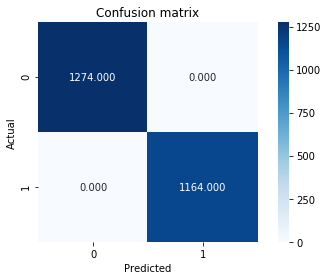

In [17]:
# WIth RANDOMFOREST and WITH LDA
modelICARF = RandomForestClassifier(n_estimators=700).fit(x_lda, y_train)


y_predLDA = modelICARF.predict(x_testlda)
conf_matrix = metrics.confusion_matrix(y_test, y_predLDA)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_predLDA)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_predLDA)) # error
print(metrics.precision_score(y_test, y_predLDA, average = None)) # precision
print(metrics.recall_score(y_test, y_predLDA, average = None)) # recall
print(metrics.f1_score(y_test, y_predLDA, average = None)) # F1 score
print(f1_score(y_predLDA, y_test, average = None))

[[1274    0]
 [   2 1162]]
0.9991796554552912
0.0008203445447088065
[0.9984326 1.       ]
[1.         0.99828179]
[0.99921569 0.99914015]
[0.99921569 0.99914015]


C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


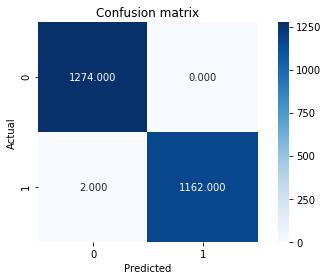

In [18]:
# WITH LDA classifier

modelLDAC = LinearDiscriminantAnalysis().fit(x_lda, y_train)
y_predLDA = modelLDAC.predict(x_testlda)
conf_matrix = metrics.confusion_matrix(y_test, y_predLDA)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_predLDA)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_predLDA)) # error
print(metrics.precision_score(y_test, y_predLDA, average = None)) # precision
print(metrics.recall_score(y_test, y_predLDA, average = None)) # recall
print(metrics.f1_score(y_test, y_predLDA, average = None)) # F1 score
print(f1_score(y_predLDA, y_test, average = None))